In [59]:
import numpy as np
import random
from linear_solvers import NumPyLinearSolver, HHL
from qiskit import Aer, QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

### Run the Ramsey sequence containing entangling and decoding

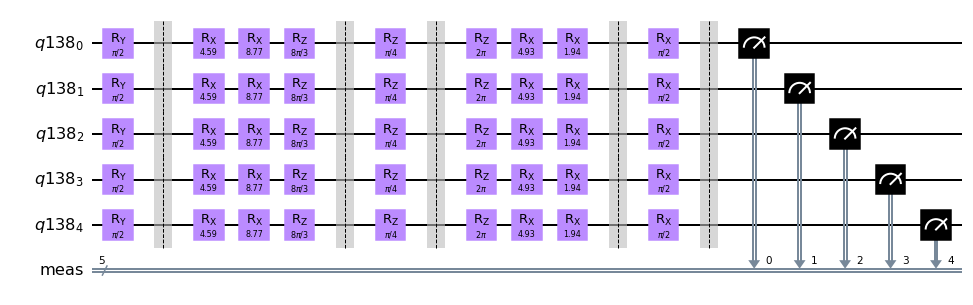

In [83]:
theta1 = np.pi/3
theta2 = np.pi/4

q_reg = QuantumRegister(5)

circ = QuantumCircuit(q_reg)

circ.ry(np.pi/2, q_reg[0:5])

circ.barrier()

#U_entangling
circ.rx(4*(theta1)**3, q_reg[0:5]) 
circ.rx(8*(theta1)**2, q_reg[0:5]) #Assuming J_xyz = 2, J^2 = 4, J(z) is a ratio of 1s to 0. 
circ.rz(8*(theta1), q_reg[0:5])

circ.barrier()

#e^(-i*phi*J_z), phi~pi/4 from the Fig.1, Classical Optimizer
circ.rz(np.pi/4, q_reg[0:5])

circ.barrier()

#U_decoding
circ.rz(8*(theta2), q_reg[0:5])
circ.rx(8*(theta2)**2, q_reg[0:5])
circ.rx(4*(theta2)**3, q_reg[0:5])

circ.barrier()

circ.rx(np.pi/2, q_reg[0:5]) #reference thethis that is stating Ry instead in the Ramsey sequence

circ.measure_all()

circ.draw("mpl")


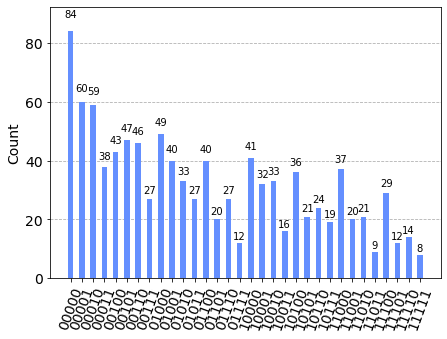

In [84]:
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)

plot_histogram(counts)
#print(counts)

### Here we count the exact number of up and down spins

In [85]:
count_zeros = 0 #spin_z down
count_ones = 0 #spin_z up

for key, value in counts.items():
    for i in str(key):
        if i == "0":
            count_zeros += value
        if i == "1":
            count_ones += value

J_z = count_zeros/count_ones
m = count_zeros - count_ones

print("J = ", J_z)
print("m = ", m)


J =  1.5396825396825398
m =  1088
